`Weronika Sadzik`

`Python - zestaw 2`

`Analiza Numeryczna 2022/23`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**IN**: Liczby rzeczywiste $a<b$, liczba $n\in \mathbb{N}$, rzeczywista funkcja $f$ klasy $C^2([a,b])$.

**OUT**: Wartość złożonej kwadratury punktu środkowego $Q_n^{\textit{MID}}(f) := Q(f,a,b,n)$, opartej na siatce jednostajnej z $n+1$ węzłami.

1) Za pomocą odpowiednio dobranego ciągu siatek jednostajnych oraz zaimplementowanego algorytmu wykazać empirycznie, że 

<center>\[\lim_{n\to+\infty} n^2 \left(\int_a^b f(x)\textit{dx} - Q_n^{\textit{MID}}(f)\right) = \frac{(b-a)^2}{24}\left( f^{'}(b) - f^{'}(a)\right).\]</center>

W tym celu, wybrać funkcję testową $f(x) = \sin x$ oraz $[a,b] = [0,\pi]$.

2) Zaimplementować i zweryfikować asymptotyczne zachowanie błędu zmodyfikowanej kwadratury punktu środkowego $\tilde{Q}_n^{\textit{MID}}$, dla której 

<center>\[\lim_{n\to+\infty} n^2 \left(\int_a^b f(x)\textit{dx} - \tilde{Q}_n^{\textit{MID}}(f)\right) = 0.\]</center>

Uruchomić oba algorytmy $Q_n^{\textit{MID}}, \tilde{Q}_n^{\textit{MID}}$ dla identycznego zbioru wartości $n$ i funkcji testowej jak powyżej. Porównać wyniki na wykresie.

## Zadanie 1

Kwadratura punktu środkowego wyraża się wzorem:

$\int_{a}^b f(x) dx \approx \frac{b-a}{n}\sum_{i=0}^{n-1} f(x_i)$, gdzie

$x_i = a + \frac{b-a}{n}(k+\frac{1}{2})$, $k=0,1,\ldots,n - 1$.

In [2]:
f = lambda x: np.sin(x)
a = 0.0
b = np.pi

f_prim = lambda x: np.cos(x)
integral_val = 2
asymptotic_const = lambda a, b: (b - a) ** 2 / 24 * (f_prim(b) - f_prim(a))
right_side = asymptotic_const(a, b)

In [3]:
def midpoint_quadrature(f, a, b, n):
    h = (b - a) / n
    quad_nodes = np.linspace(a + .5 * h, b - .5 * h, n)
    area = h * np.sum(f(quad_nodes))
    return area

In [4]:
ns = [10 ** i for i in range(1, 9)]
results_mid = []
for n in ns:
    result = n ** 2 * (integral_val - midpoint_quadrature(f, a, b, n))
    error = result - right_side
    # krotka (log10(n), wartość lewej strony pod granicą, błąd lewa strona pod granicą - prawa strona)
    results_mid.append((np.log10(n), result, error))

In [5]:
results_mid

[(1.0, -0.8248407907974098, -0.002373757373296592),
 (2.0, -0.8224907098597356, -2.3676435622399516e-05),
 (3.0, -0.8224672702894509, -2.3686533767719453e-07),
 (4.0, -0.8224670278167423, 5.607370900939657e-09),
 (5.0, -0.8224665393186115, 4.941055017360085e-07),
 (6.0, -0.822897305852166, -0.00043027242805282473),
 (7.0, -0.8881784197001252, -0.06571138627601203),
 (8.0, -106.58141036401503, -105.75894333059091)]

Od $n=10^5$ różnica między wartością lewej strony tezy pod granicą, a prawą stroną tezy zaczyna intensywnie się zwiększać. Najprawdopodobniej jest to kwestia arytmetyki fl. Po takiej obserwacji przyjmuję, że ciąg $n$, dla których będę tworzyć ciąg siatek jednostajnych to $(10, 100, 1000, 10000)$.

In [6]:
ns = [10 ** i for i in range(1, 5)]
results_mid = []
quad_results_mid = []
for n in ns:
    quad_results_mid.append((np.log10(n), np.log10(midpoint_quadrature(f, a, b, n))))
    result = n ** 2 * (integral_val - midpoint_quadrature(f, a, b, n))
    results_mid.append((np.log10(n), result))

In [7]:
print(results_mid, right_side, sep='\n')

[(1.0, -0.8248407907974098), (2.0, -0.8224907098597356), (3.0, -0.8224672702894509), (4.0, -0.8224670278167423)]
-0.8224670334241132


Dla $n=10^4$ otrzymujemy prawą stronę tezy z dokładnością do 7 miejsca do przecinku.

## Zadanie 2

Zmodyfikowana kwadratura punktu środkowego wyraża się wzorem:

$\int_{a}^b f(x) dx \approx \frac{b-a}{n}\sum_{i=0}^{n-1} f(x_i) + n^{-2}\frac{(b-a)^2}{24}\left( f^{'}(b) - f^{'}(a)\right)$, gdzie

$x_i = a + \frac{b-a}{n}(k+\frac{1}{2})$, $k=0,1,\ldots,n - 1$.

In [8]:
def modified_midpoint_quadrature(f, a, b, n):
    h = (b - a) / n
    quad_nodes = np.linspace(a + .5 * h, b - .5 * h, n)
    area = h * np.sum(f(quad_nodes)) + n ** (-2) * asymptotic_const(a, b)
    return area

In [9]:
ns = [10 ** i for i in range(1, 9)]
results_modif_mid = []
for n in ns:
    results_modif_mid.append((np.log10(n), integral_val - modified_midpoint_quadrature(f, a, b, n)))

In [10]:
results_modif_mid

[(1.0, -2.373757373286267e-05),
 (2.0, -2.367643414658005e-09),
 (3.0, -2.3669954885008337e-13),
 (4.0, 0.0),
 (5.0, 0.0),
 (6.0, -4.440892098500626e-16),
 (7.0, -4.440892098500626e-16),
 (8.0, -1.0658141036401503e-14)]

Podobnie jak wcześniej, tylko tym razem od $n=10^6$ błąd kwadratury zaczyna się zwiększać. Ponieważ wynik kwadratury dla $n=10^4$ i $n=10^5$ nie różni się, to przyjmuję, że ciąg $n$, dla których będę tworzyć ciąg siatek jednostajnych to ponownie $(10, 100, 1000, 10000)$.

In [11]:
ns = [10 ** i for i in range(1, 5)]
results_modif_mid = []
quad_results_modif_mid = []
for n in ns:
    quad_results_modif_mid.append((np.log10(n), np.log10(modified_midpoint_quadrature(f, a, b, n))))
    results_modif_mid.append((np.log10(n), integral_val - modified_midpoint_quadrature(f, a, b, n)))

In [12]:
results_modif_mid

[(1.0, -2.373757373286267e-05),
 (2.0, -2.367643414658005e-09),
 (3.0, -2.3669954885008337e-13),
 (4.0, 0.0)]

Dla $n=10^4$ otrzymaliśmy błąd kwadratury równy 0.

Porównajmy wyniki kwadratur na wykresie.

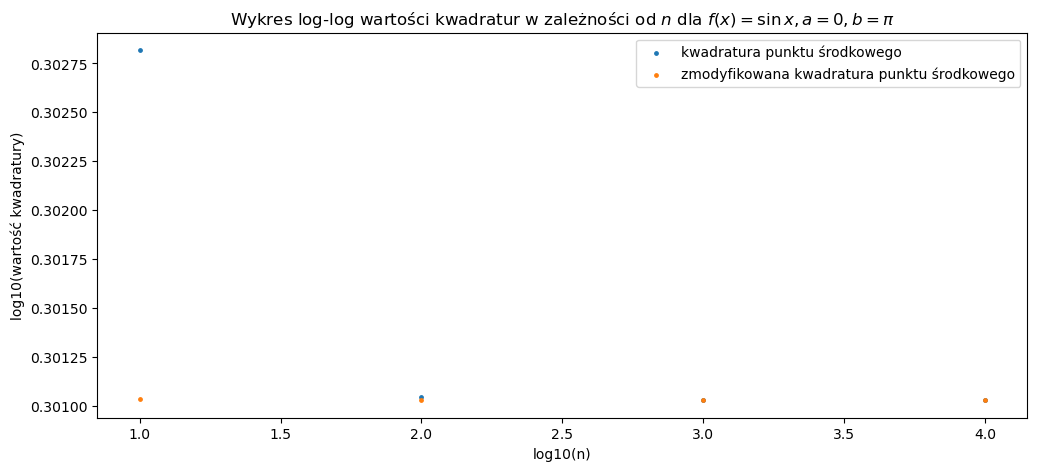

In [13]:
plt.figure(figsize=(12, 5))
plt.scatter(*zip(*quad_results_mid), label='kwadratura punktu środkowego', s=6)
plt.scatter(*zip(*quad_results_modif_mid), label='zmodyfikowana kwadratura punktu środkowego', s=6)
plt.xlabel('log10(n)')
plt.ylabel('log10(wartość kwadratury)')
plt.legend()
plt.title('Wykres log-log wartości kwadratur w zależności od $n$ dla $f(x) = \sin x, a=0, b=\pi$')
plt.show()

Z wykresu możemy zobaczyć, że zmodyfikowana kwadratura punktu środkowego pozwala nam uzyskać dość dokładny wynik (do 4 miejsc po przecinku) już dla $n=10$, a dla $n=100$ uzyskujemy dokładność aż do 8 miejsc po przecinku. Z drugiej strony, kwadratura punktu środkowego daje nam wynik dokładny do 8 miejsc po przecinku dopiero dla $n=10000$.